<a href="https://colab.research.google.com/github/Arrion-Jhiolionton/web2/blob/main/imageaugementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ============================================
# 📦 CELL 1: Install Dependencies
# ============================================

!pip install albumentations --quiet
print("✅ Albumentations installed!")

# ============================================
# 📚 CELL 2: Import Libraries
# ============================================

import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

print("✅ Libraries imported!")

✅ Albumentations installed!
✅ Libraries imported!


In [4]:
# ============================================
# 📤 CELL 3: Upload Your Image
# ============================================

print("📤 Please upload your prescription image...")
uploaded = files.upload()

# Get the filename
IMAGE_PATH = list(uploaded.keys())[0]
print(f"✅ Uploaded: {IMAGE_PATH}")

📤 Please upload your prescription image...


Saving pres - 1241.jpg to pres - 1241.jpg
✅ Uploaded: pres - 1241.jpg


✅ Image loaded!
   Shape: (1134, 818, 3)
   Size: 818x1134 pixels


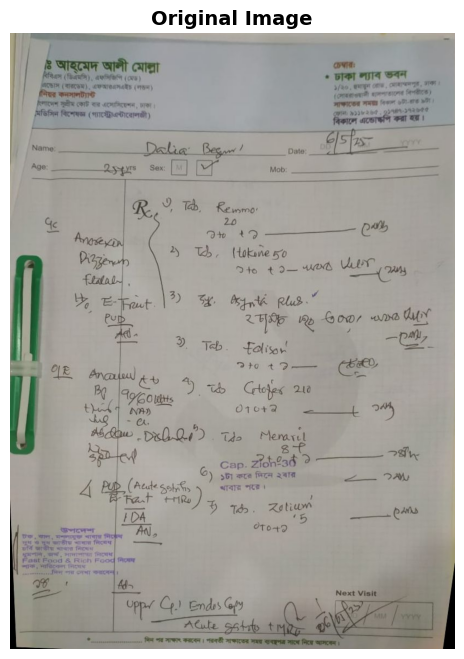

In [5]:
# ============================================
# 🖼️ CELL 4: Load Image
# ============================================

# Load image
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"✅ Image loaded!")
print(f"   Shape: {image.shape}")
print(f"   Size: {image.shape[1]}x{image.shape[0]} pixels")

# Show original
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

In [7]:
# ============================================
# 🔄 CELL 5: Define All Augmentations
# ============================================

augmentations = {
    # ----- GEOMETRIC TRANSFORMS -----
    "Original": None,

    "Rotation\n(-15° to +15°)": A.Rotate(limit=15, p=1.0),

    "Scale\n(0.8x - 1.2x)": A.Affine(scale=(0.8, 1.2), p=1.0),

    "Translation\n(Shift X/Y)": A.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        p=1.0
    ),

    "Shearing\n(Slant Effect)": A.Affine(
        shear={"x": (-15, 15), "y": (-15, 15)},
        p=1.0
    ),

    "Perspective\n(Viewpoint Change)": A.Perspective(scale=(0.05, 0.1), p=1.0),

    # ----- COLOR TRANSFORMS -----
    "Brightness\n(±40%)": A.RandomBrightnessContrast(
        brightness_limit=0.4,
        contrast_limit=0,
        p=1.0
    ),

    "Contrast\n(±40%)": A.RandomBrightnessContrast(
        brightness_limit=0,
        contrast_limit=0.4,
        p=1.0
    ),

    "Hue Shift\n(Color Tone)": A.HueSaturationValue(
        hue_shift_limit=30,
        sat_shift_limit=0,
        val_shift_limit=0,
        p=1.0
    ),

    "Saturation\n(Color Intensity)": A.HueSaturationValue(
        hue_shift_limit=0,
        sat_shift_limit=50,
        val_shift_limit=0,
        p=1.0
    ),

    "Grayscale\n(Black & White)": A.ToGray(p=1.0),

    # ----- NOISE & DISTORTION -----
    "Gaussian Noise\n(Random Pixels)": A.GaussNoise(var_limit=(50, 150), p=1.0),

    "Gaussian Blur\n(Blur Effect)": A.GaussianBlur(blur_limit=(7, 11), p=1.0),

    "Random Erasing\n(Block Occlusion)": A.CoarseDropout(
        max_holes=8,
        max_height=32,
        max_width=32,
        min_holes=4,
        min_height=16,
        min_width=16,
        fill_value=0,
        p=1.0
    ),

    "JPEG Compression\n(Quality Loss)": A.ImageCompression(
        quality_lower=20,
        quality_upper=40,
        p=1.0
    ),
}

print(f"✅ Defined {len(augmentations)} augmentations")

✅ Defined 15 augmentations


/tmp/ipython-input-2942136019.py:55: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  "Gaussian Noise\n(Random Pixels)": A.GaussNoise(var_limit=(50, 150), p=1.0),
/tmp/ipython-input-2942136019.py:59: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  "Random Erasing\n(Block Occlusion)": A.CoarseDropout(
/tmp/ipython-input-2942136019.py:70: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  "JPEG Compression\n(Quality Loss)": A.ImageCompression(


In [8]:
# ============================================
# ⚡ CELL 6: Apply All Augmentations
# ============================================

augmented_images = {}

for name, transform in augmentations.items():
    if transform is None:
        augmented_images[name] = image.copy()
    else:
        result = transform(image=image)
        augmented_images[name] = result["image"]

print(f"✅ Applied {len(augmentations)} augmentations successfully!")

✅ Applied 15 augmentations successfully!


/tmp/ipython-input-2011401627.py:39: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2011401627.py:40: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.savefig("augmentation_demo.png", dpi=150, bbox_inches="tight", facecolor="white")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


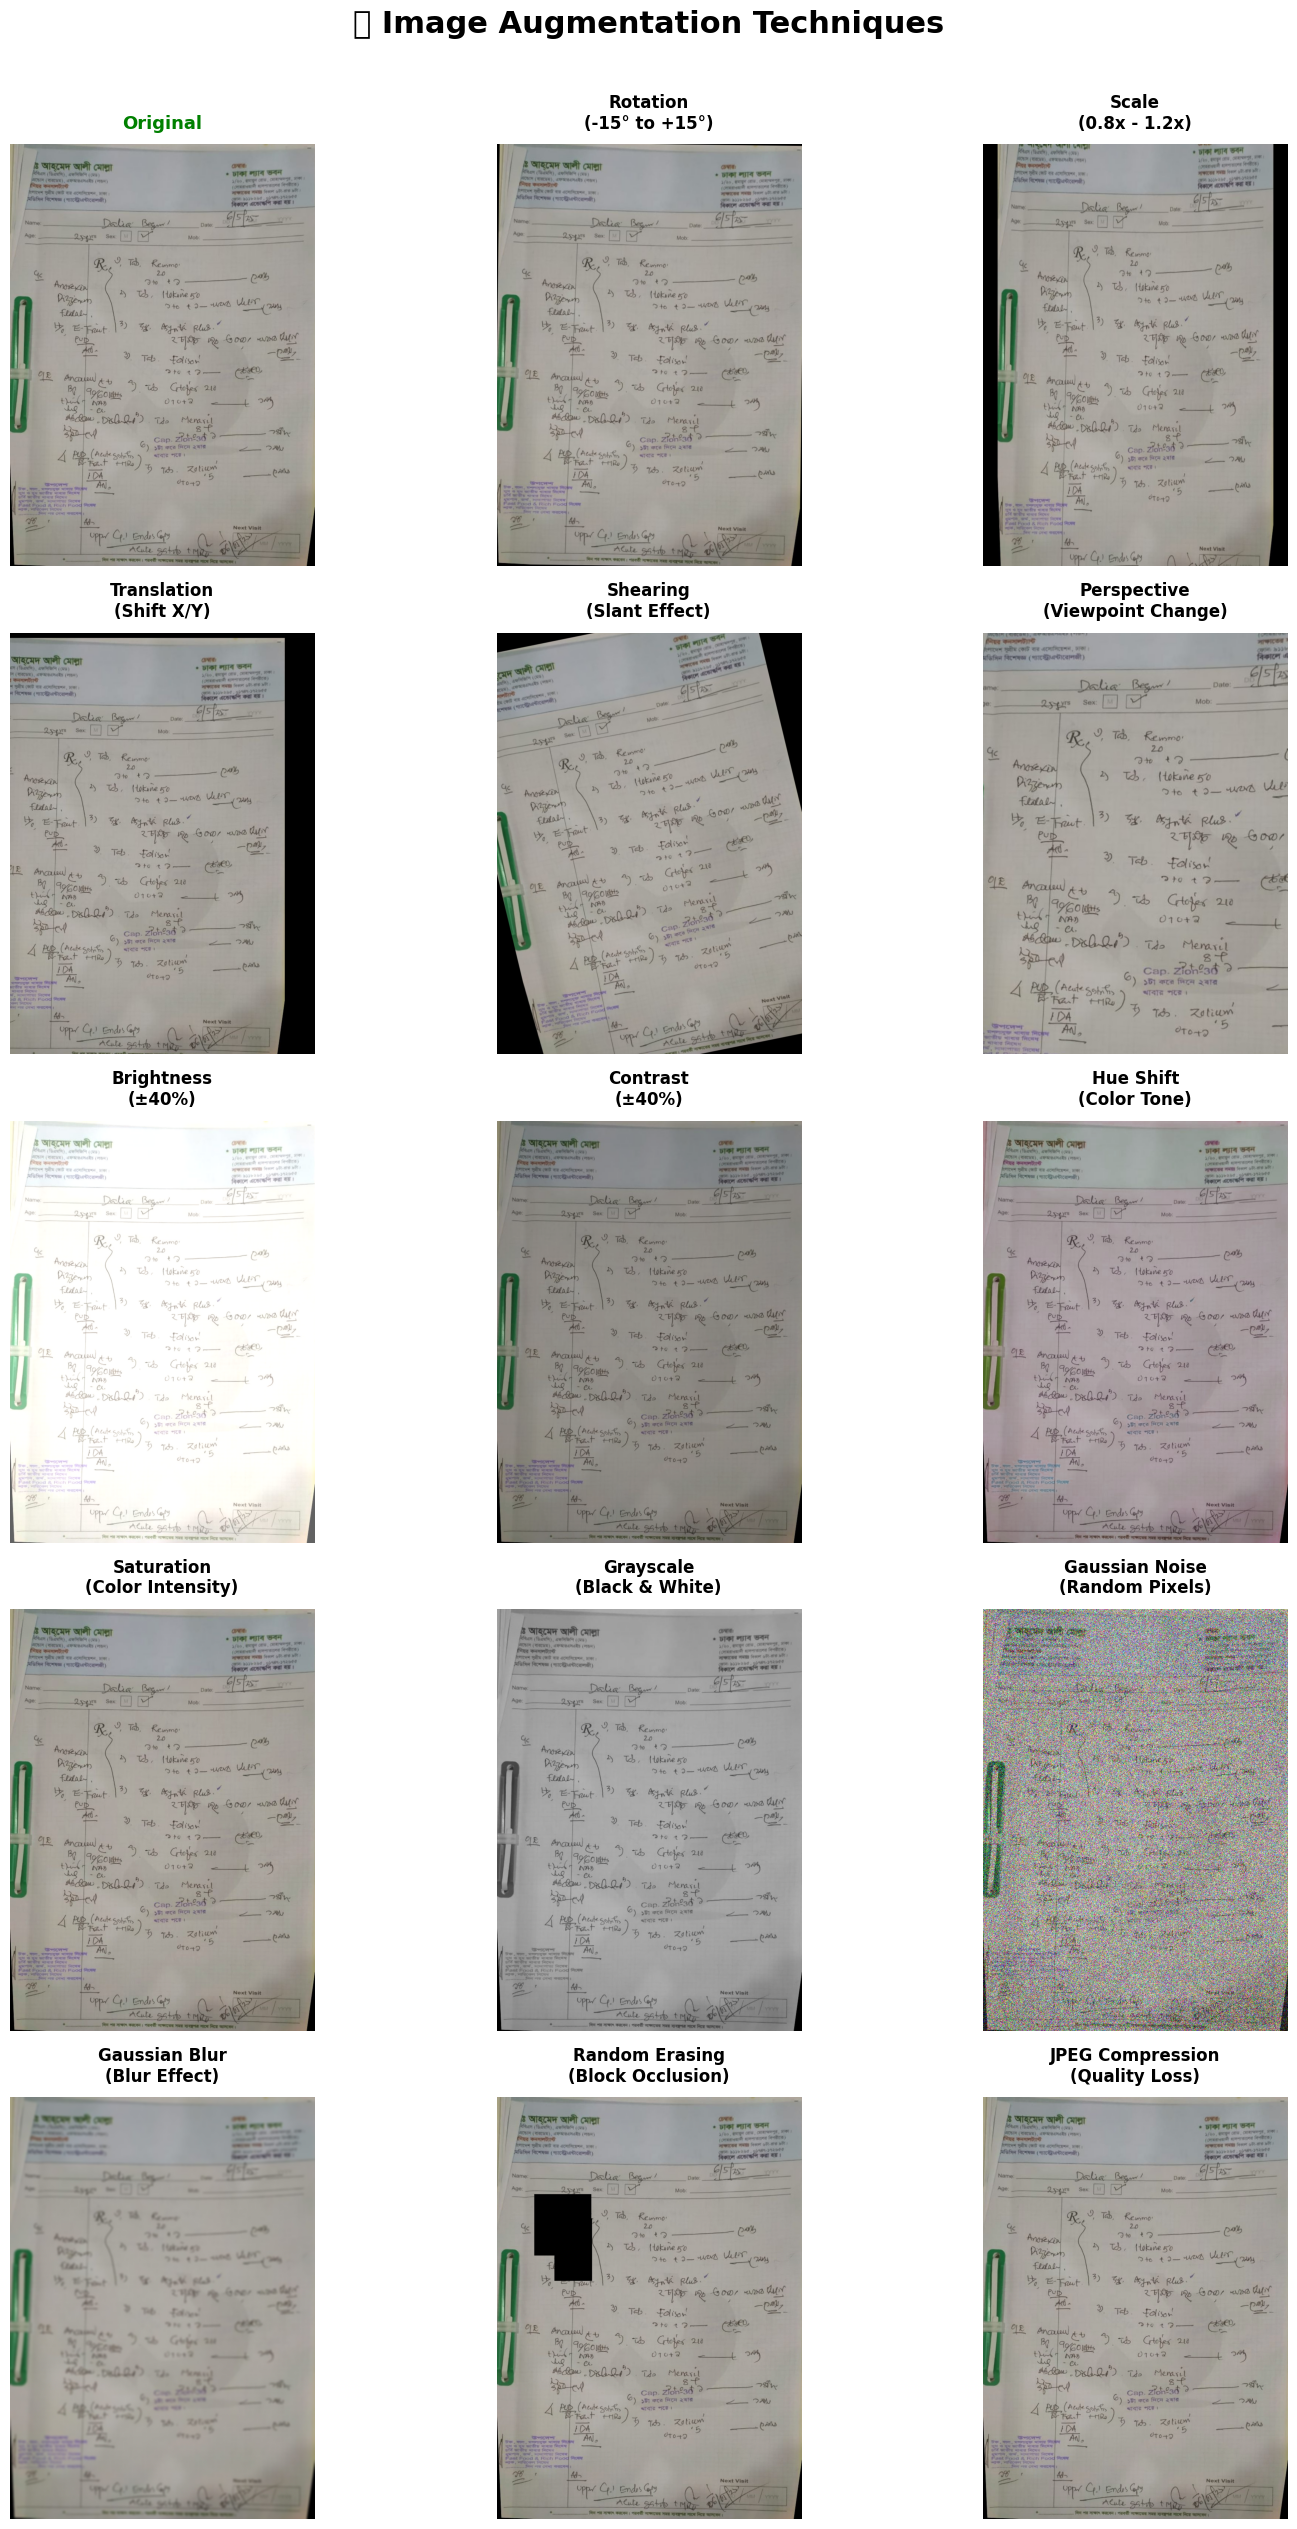

✅ Saved: augmentation_demo.png


In [9]:
# ============================================
# 📊 CELL 7: Visualize in 3-Column Grid
# ============================================

num_images = len(augmented_images)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
fig.suptitle("🔄 Image Augmentation Techniques", fontsize=22, fontweight="bold", y=1.01)

# Flatten axes
axes = axes.flatten()

for idx, (name, img) in enumerate(augmented_images.items()):
    ax = axes[idx]

    # Handle grayscale
    if len(img.shape) == 2:
        ax.imshow(img, cmap="gray")
    else:
        ax.imshow(img)

    # Style
    if "Original" in name:
        ax.set_title(name, fontsize=13, fontweight="bold", color="green", pad=12)
        for spine in ax.spines.values():
            spine.set_color("green")
            spine.set_linewidth(4)
    else:
        ax.set_title(name, fontsize=12, fontweight="bold", pad=12)

    ax.axis("off")

# Hide empty subplots
for idx in range(num_images, len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.savefig("augmentation_demo.png", dpi=150, bbox_inches="tight", facecolor="white")
plt.show()

print("✅ Saved: augmentation_demo.png")


🔥 COMBINED AGGRESSIVE AUGMENTATION
   (Multiple transforms applied together)


/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipython-input-4052876964.py:29: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(30, 100)),
/tmp/ipython-input-4052876964.py:33: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=40, quality_upper=80, p=0.3),
/tmp/ipython-input-4052876964.py:36: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(
/tmp/ipython-input-4052876964.py:65: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4052876964.py:66: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig("aggressive

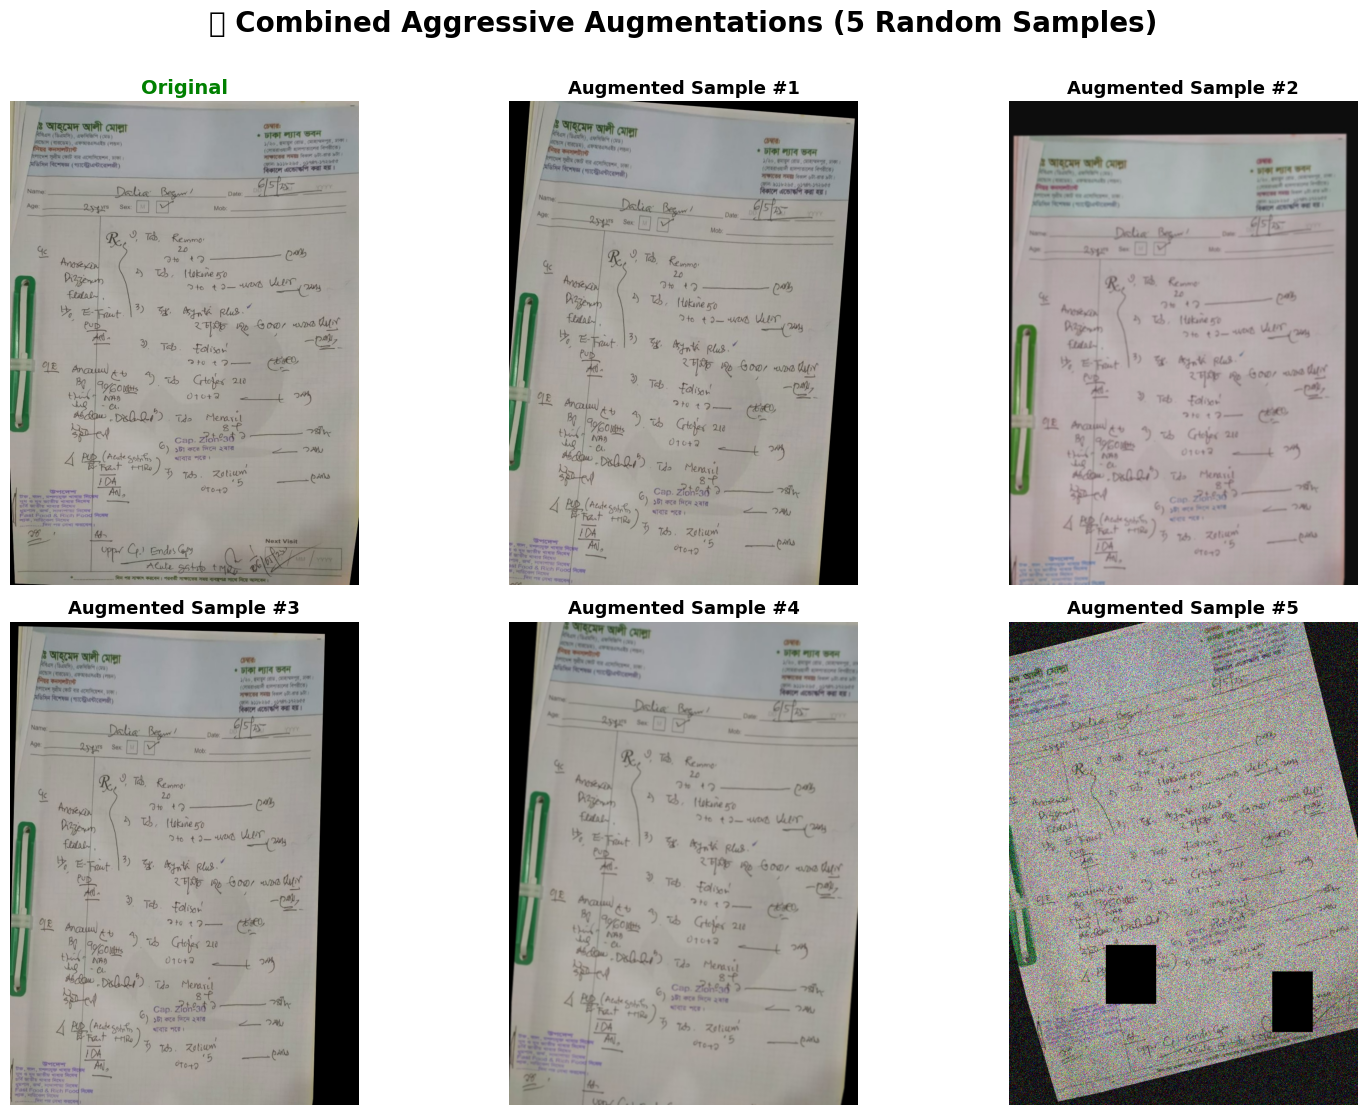

✅ Saved: aggressive_augmentation_demo.png


In [12]:
# ============================================
# 🔥 CELL 8: Combined Aggressive Augmentation
# ============================================

print("\n" + "="*60)
print("🔥 COMBINED AGGRESSIVE AUGMENTATION")
print("   (Multiple transforms applied together)")
print("="*60)

aggressive_transform = A.Compose([
    # Geometric
    A.ShiftScaleRotate(
        shift_limit=0.1,
        scale_limit=0.15,
        rotate_limit=15,
        p=0.7
    ),
    A.Perspective(scale=(0.02, 0.08), p=0.3),

    # Color
    A.OneOf([
        A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.3),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20),
    ], p=0.5),

    # Noise/Blur
    A.OneOf([
        A.GaussianBlur(blur_limit=(3, 7)),
        A.GaussNoise(var_limit=(30, 100)),
    ], p=0.4),

    # Compression
    A.ImageCompression(quality_lower=40, quality_upper=80, p=0.3),

    # Random Erasing
    A.CoarseDropout(
        max_holes=5,
        max_height=25,
        max_width=25,
        p=0.2
    ),
])

# Generate 5 aggressive augmentations
fig, axes = plt.subplots(2, 3, figsize=(16, 11))
fig.suptitle("🔥 Combined Aggressive Augmentations (5 Random Samples)",
             fontsize=20, fontweight="bold", y=1.01)
axes = axes.flatten()

# Original
axes[0].imshow(image)
axes[0].set_title("Original", fontsize=14, fontweight="bold", color="green")
for spine in axes[0].spines.values():
    spine.set_color("green")
    spine.set_linewidth(4)
axes[0].axis("off")

# 5 augmented versions
for i in range(1, 6):
    result = aggressive_transform(image=image)
    axes[i].imshow(result["image"])
    axes[i].set_title(f"Augmented Sample #{i}", fontsize=13, fontweight="bold")
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("aggressive_augmentation_demo.png", dpi=150, bbox_inches="tight", facecolor="white")
plt.show()

print("✅ Saved: aggressive_augmentation_demo.png")

In [13]:
# # ============================================
# # 💾 CELL 9: Download Results
# # ============================================

# print("\n📥 Downloading result images...")
# files.download("augmentation_demo.png")
# files.download("aggressive_augmentation_demo.png")
# print("✅ Download complete!")


📥 Downloading result images...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download complete!


In [14]:
# ============================================
# 💾 CELL 9: Save Individual Augmented Images
# ============================================

import os

# Create output folder
output_folder = "augmented_images"
os.makedirs(output_folder, exist_ok=True)

# Get original image name without extension
original_name = os.path.splitext(IMAGE_PATH)[0]

print(f"💾 Saving individual augmented images...")
print(f"   Original image: {IMAGE_PATH}")
print(f"   Base name: {original_name}")
print()

saved_count = 0

for name, img in augmented_images.items():
    # Skip original
    if "Original" in name:
        continue

    # Create clean filename
    # Remove newlines and special characters
    clean_name = name.replace("\n", "_").replace(" ", "_").replace("(", "").replace(")", "").replace("±", "").replace("%", "")

    # Create filename: original_name + augmentation_name
    filename = f"{original_name}_{clean_name}.jpg"
    filepath = os.path.join(output_folder, filename)

    # Convert RGB to BGR for OpenCV
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) if len(img.shape) == 3 else img

    # Save image
    cv2.imwrite(filepath, img_bgr)
    saved_count += 1

    print(f"   ✅ Saved: {filename}")

print()
print(f"✅ Total saved: {saved_count} augmented images")
print(f"📁 Location: {output_folder}/")

# Also save the grid visualizations
cv2.imwrite(os.path.join(output_folder, "augmentation_demo.png"),
            cv2.cvtColor(plt.imread("augmentation_demo.png"), cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_folder, "aggressive_augmentation_demo.png"),
            cv2.cvtColor(plt.imread("aggressive_augmentation_demo.png"), cv2.COLOR_RGB2BGR))

print(f"   ✅ Saved: augmentation_demo.png")
print(f"   ✅ Saved: aggressive_augmentation_demo.png")

💾 Saving individual augmented images...
   Original image: pres - 1241.jpg
   Base name: pres - 1241

   ✅ Saved: pres - 1241_Rotation_-15°_to_+15°.jpg
   ✅ Saved: pres - 1241_Scale_0.8x_-_1.2x.jpg
   ✅ Saved: pres - 1241_Translation_Shift_X/Y.jpg
   ✅ Saved: pres - 1241_Shearing_Slant_Effect.jpg
   ✅ Saved: pres - 1241_Perspective_Viewpoint_Change.jpg
   ✅ Saved: pres - 1241_Brightness_40.jpg
   ✅ Saved: pres - 1241_Contrast_40.jpg
   ✅ Saved: pres - 1241_Hue_Shift_Color_Tone.jpg
   ✅ Saved: pres - 1241_Saturation_Color_Intensity.jpg
   ✅ Saved: pres - 1241_Grayscale_Black_&_White.jpg
   ✅ Saved: pres - 1241_Gaussian_Noise_Random_Pixels.jpg
   ✅ Saved: pres - 1241_Gaussian_Blur_Blur_Effect.jpg
   ✅ Saved: pres - 1241_Random_Erasing_Block_Occlusion.jpg
   ✅ Saved: pres - 1241_JPEG_Compression_Quality_Loss.jpg

✅ Total saved: 14 augmented images
📁 Location: augmented_images/
   ✅ Saved: augmentation_demo.png
   ✅ Saved: aggressive_augmentation_demo.png


In [15]:
# ============================================
# 📥 CELL 10: Download All Images as ZIP
# ============================================

import shutil

# Create ZIP file
zip_filename = f"{original_name}_augmentations"
shutil.make_archive(zip_filename, 'zip', output_folder)

print(f"\n📦 Created ZIP file: {zip_filename}.zip")
print(f"   Contains: {saved_count + 2} files")
print()

# Download the ZIP
files.download(f"{zip_filename}.zip")
print("✅ Download complete!")


📦 Created ZIP file: pres - 1241_augmentations.zip
   Contains: 16 files



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download complete!
